<a href="https://colab.research.google.com/github/coder-penguin/ML/blob/master/tutorial/scikit_learn_tutorial_regression_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sample code for regression with multiple models

Load libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Read data

In [0]:
# read the boston housing dataset
dataset = load_boston()

In [0]:
#13 features
dataset['data'].shape

(506, 13)

In [0]:
# image(numpy.ndarray)
X = dataset.data

# label(numpy.ndarray)
y = dataset.target

In [0]:
#split dataset to train and test dataset beforehand
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True)#default is True

In [0]:
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

404 102
404 102


In [0]:
df = pd.DataFrame(X_train,columns = dataset.feature_names)

In [0]:
df['target'] = y_train



*   CRIM per capita crime rate by town
*   ZN proportion of residential land zoned for lots over 25,000 sq.ft.
*   INDUS proportion of non-retail business acres per town
*   CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
*   NOX nitric oxides concentration (parts per 10 million)
*   RM average number of rooms per dwelling
*   AGE proportion of owner-occupied units built prior to 1940
*   DIS weighted distances to five Boston employment centres
*   RAD index of accessibility to radial highways
*   TAX full-value property-tax rate per $10,000
*   PTRATIO pupil-teacher ratio by town
*   B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

*   LSTAT % lower status of the population
*   MEDV Median value of owner-occupied homes in $1000’s


In [0]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.01360,75.0,4.00,0.0,0.410,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80,18.9
1,4.34879,0.0,18.10,0.0,0.580,6.167,84.0,3.0334,24.0,666.0,20.2,396.90,16.29,19.9
2,22.59710,0.0,18.10,0.0,0.700,5.000,89.5,1.5184,24.0,666.0,20.2,396.90,31.99,7.4
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,0.06047,0.0,2.46,0.0,0.488,6.153,68.8,3.2797,3.0,193.0,17.8,387.11,13.15,29.6


In [0]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.522756,11.602723,11.021040,0.066832,0.549613,6.285985,68.154950,3.885920,9.490099,405.232673,18.473267,360.241980,12.549926,22.521287
std,8.842850,23.566467,6.778451,0.250040,0.110814,0.670501,28.202363,2.145689,8.613706,167.396664,2.183943,85.713647,6.874478,9.221509
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.084320,0.000000,5.190000,0.000000,0.449000,5.886500,43.625000,2.109750,4.000000,281.000000,17.375000,375.910000,7.195000,16.800000
50%,0.250895,0.000000,8.560000,0.000000,0.532000,6.208500,76.500000,3.366650,5.000000,329.000000,19.100000,391.880000,11.265000,21.200000
75%,3.594927,13.750000,18.100000,0.000000,0.624000,6.626000,94.025000,5.287300,24.000000,666.000000,20.200000,396.215000,16.992500,24.850000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.770000,50.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b062cbef0>,
      dtype=object)

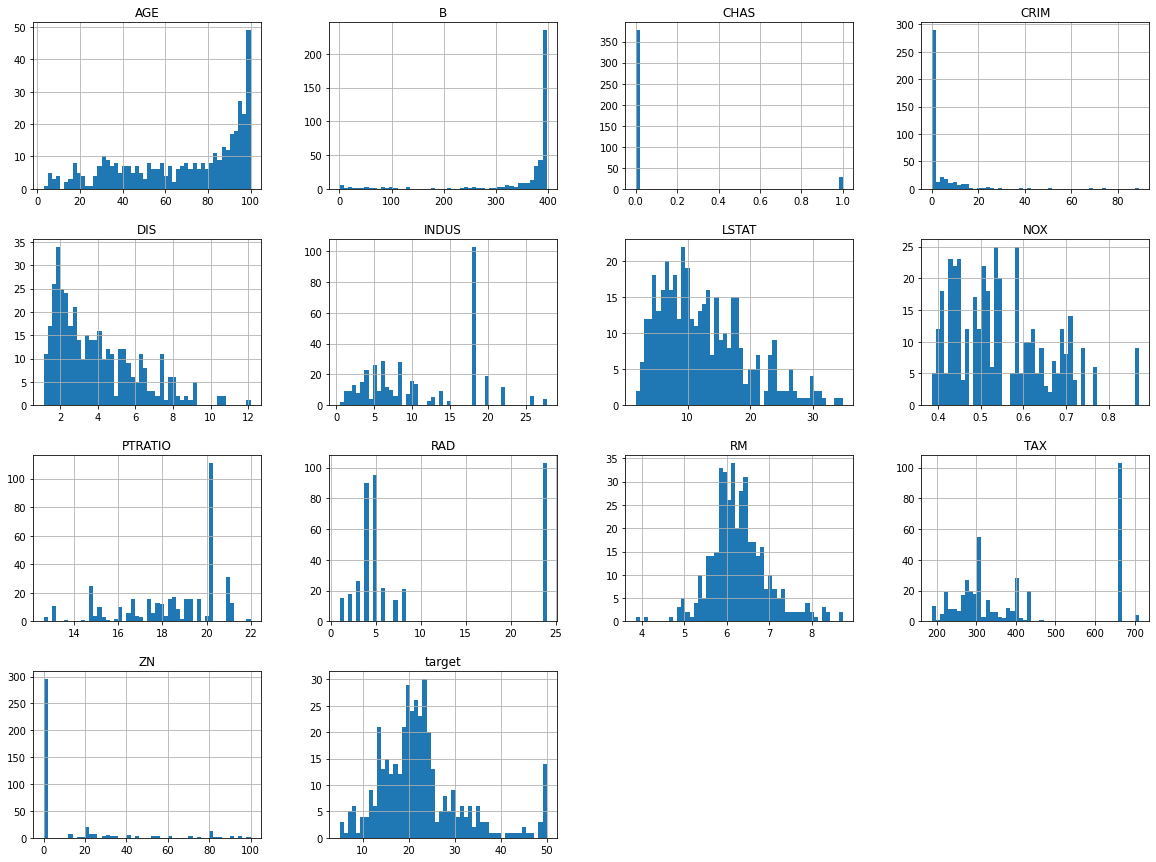

In [0]:
# show data
df.hist(bins=50, figsize=(20,15))

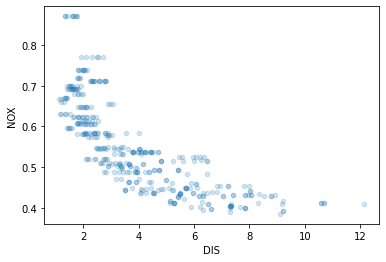

In [0]:
df.plot(kind='scatter', x='DIS', y='NOX', alpha=0.2)

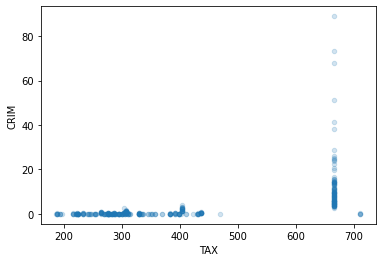

In [0]:
df.plot(kind='scatter', x='TAX', y='CRIM', alpha=0.2)

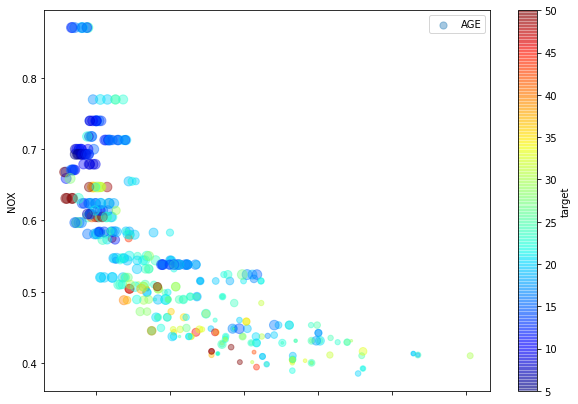

In [0]:
df.plot(kind='scatter', x='DIS', y='NOX', alpha=0.4, s=df['AGE'], label='AGE', figsize=(10, 7), c='target', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

In [0]:
#standard correlation coefficient
corr_mx = df.corr()

In [0]:
corr_mx['target'].sort_values(ascending=False)

target     1.000000
RM         0.716497
ZN         0.356289
B          0.304595
DIS        0.209864
CHAS       0.198259
RAD       -0.344281
AGE       -0.353282
CRIM      -0.357268
NOX       -0.394035
TAX       -0.434882
INDUS     -0.447115
PTRATIO   -0.533055
LSTAT     -0.736972
Name: target, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b050be978>,
      dtype=object)

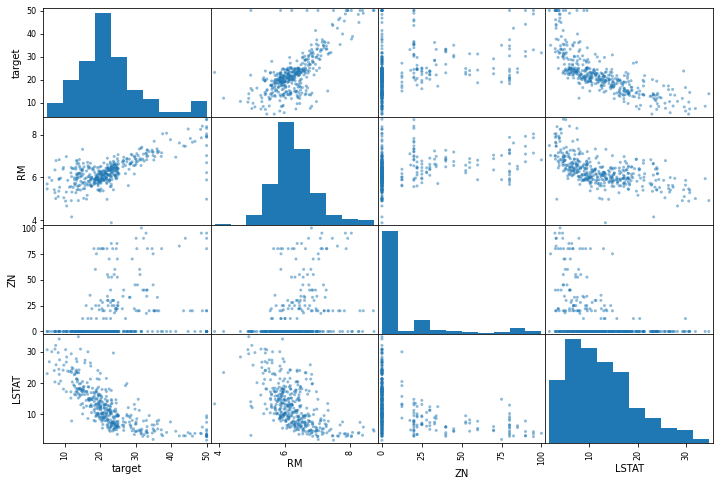

In [0]:
attributes = ['target', 'RM', 'ZN', 'LSTAT']
pd.plotting.scatter_matrix(df[attributes], figsize=(12, 8))

###Data Processing

make lists

In [0]:
cat_attribs = ['CHAS', 'RAD'] # categorical variables

In [0]:
df_num = df.drop(cat_attribs + ['target'], axis='columns')
num_attribs = list(df_num) #numerical variables

In [0]:
print(cat_attribs)
print(num_attribs)

['CHAS', 'RAD']
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']


define pipelines

In [0]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [0]:
num_pipeline = Pipeline([
                         ('selector', DataFrameSelector(num_attribs)), #select columns to be processed
                         ('imputer', SimpleImputer(strategy='median')), #fill NULL
                         ('std_scaler', StandardScaler()) #standarization
                       ])

In [0]:
cat_pipeline = Pipeline([
                         ('selector', DataFrameSelector(cat_attribs)), #select columns to be processed
                         ('encoder', OneHotEncoder(sparse=True)) #convert categories to onehot vectors 
                      ])

In [0]:
full_pipeline = FeatureUnion(transformer_list=[('num_pipeline', num_pipeline), ('cat_pipeline', cat_pipeline)])

apply data processing

In [0]:
X_train_processed = full_pipeline.fit_transform(df)

In [0]:
X_train_processed.shape

(404, 22)

###Train model

In [0]:
models = {'linear regression' : LinearRegression(),
                'sgd regressor' : SGDRegressor(),
                'decision tree' : DecisionTreeRegressor(),
                'random forest' : RandomForestRegressor(),
                'svm regressor' : SVR(),
                'xgboost' : XGBRegressor()}

In [0]:
for key in models:
  models[key].fit(X_train_processed, y_train)

[03:02:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


###Evaluation

k-th cross validation

In [0]:
def kth_cross_validation(model):
   #k-th cross validation
   cv = 3 #the number of foldings
   scores = cross_val_score(model, X_train_processed, y_train, cv=cv, scoring='neg_mean_squared_error')
   return scores

In [0]:
for key in models:
  scores = kth_cross_validation(models[key])
  print(key, np.sqrt(-scores).mean(), ' +- ', np.sqrt(-scores).std())

linear regression 4.787839976290292  +-  0.30178843478651945
sgd regressor 4.761397916960895  +-  0.2801378440670115
decision tree 5.378097610995604  +-  1.0467826630273451
random forest 3.437859050548326  +-  0.47476288559689567
svm regressor 5.865204632821403  +-  1.1094796374136768
[03:04:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:04:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:04:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgboost 3.3488170687736214  +-  0.31970616550767506


###Test

In [0]:
df_test = pd.DataFrame(X_test,columns = dataset.feature_names)
X_test_processed = full_pipeline.transform(df_test)

In [0]:
X_test_processed.shape

(102, 22)

In [0]:
for key in models:
    y_test_pred = models[key].predict(X_test_processed)
    score = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(key, score)

linear regression 5.373925598521912
sgd regressor 5.361076873784002
decision tree 4.672541819911677
random forest 4.3369870923506
svm regressor 5.031525003173694
xgboost 4.069491322265135


(array([ 2.,  2.,  0.,  1.,  6.,  4., 10., 21., 20.,  9.,  9.,  6.,  5.,
         2.,  2.,  1.,  1.,  0.,  0.,  1.]),
 array([-11.44920845, -10.16282106,  -8.87643368,  -7.59004629,
         -6.30365891,  -5.01727152,  -3.73088413,  -2.44449675,
         -1.15810936,   0.12827803,   1.41466541,   2.7010528 ,
          3.98744019,   5.27382757,   6.56021496,   7.84660234,
          9.13298973,  10.41937712,  11.7057645 ,  12.99215189,
         14.27853928]),
 <a list of 20 Patch objects>)

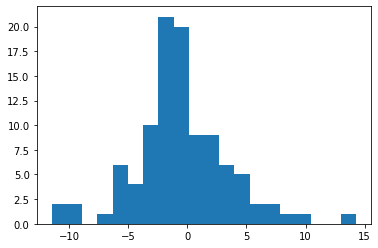

In [0]:
plt.hist(y_test_pred-y_test, bins=20)

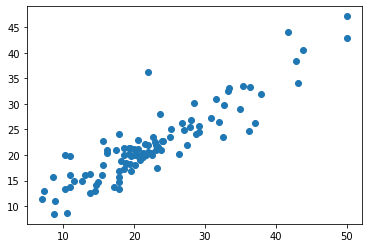

In [0]:
plt.scatter(y_test, y_test_pred)